In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starry

starry.config.lazy = False
starry.config.quiet = True

In [2]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [3]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)

In [4]:
radius = 15
theta = np.multiply(meanPhase, 360)

best_phase = 45.3
best_contrast = 0.252
best_radius = 15.0
best_lat = 45.1

min_chi = 10000

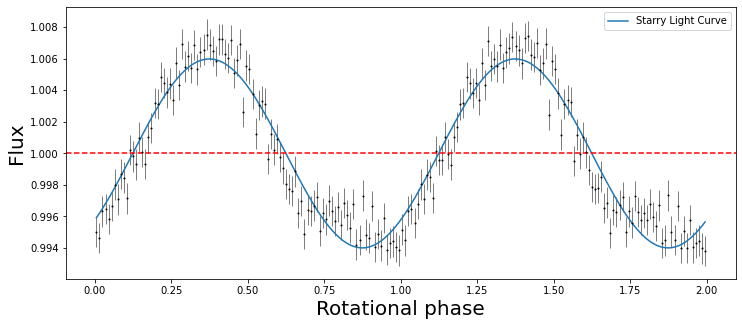

In [10]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=best_radius, lat=best_lat, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

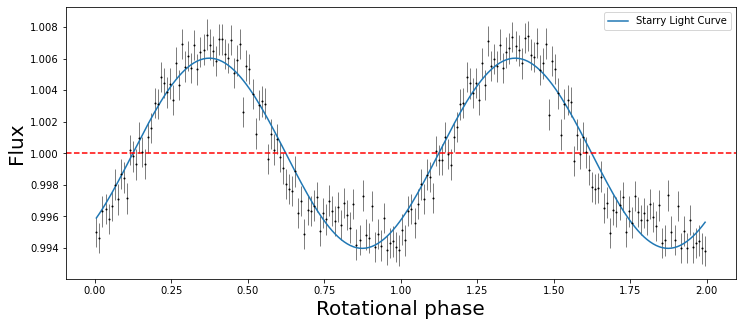

In [9]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=best_radius, lat=best_lat, lon=best_phase, spot_smoothing=0)
map.inc = 30
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

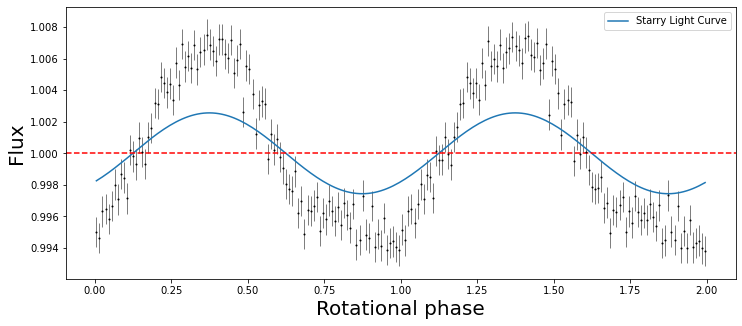

In [44]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=best_radius, lat=30, lon=best_phase, spot_smoothing=0)
map.inc = 10
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

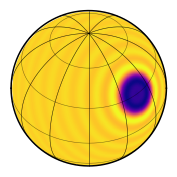

In [40]:
map.show()

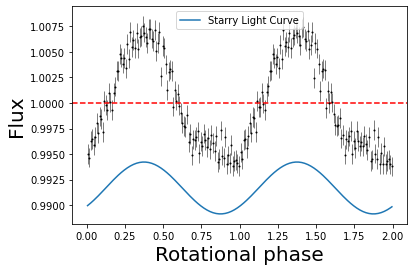

In [45]:
plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

In [46]:
median

0.9916774519861409